# CAPTURE SMALL WORLD THROUGH HOMOPHILY TUNING

The Watts and Strogatz model assume a ordered starting point.(http://worrydream.com/refs/Watts-CollectiveDynamicsOfSmallWorldNetworks.pdf)

" Friedman (1974) argues that a more realistic (and hence less idealized) model explains better on the unification account" Stanford Encyclopedia of Philosophy, Models in Science, Explaining with models

Let's try to bring out the phenomenon starting from the construction of the network as in the barabasi model.

The probability of a new link will depend on the a a priori probability and on a probability inversely proportional to the distance.

ASSUMPTION: the nodes will be located in a space, this will simulate the exogenous factors the bring to be more similar nodes in a specif contest (HOMOPHILY). I hope this also leads to a high transitivity.

Note how a parameterizing paradigm is inherited from the Watts and Strogatz model. Tuning a parameter will lead to extreme situation.

### MODEL:

$P( (v_{i} , v_{j} ) \epsilon L ) = (p - \alpha ) + \alpha \times r( d( v_{i} , v_{j} ) ) $ where $ 0 \le \alpha \le p $

Problem: increasing alpha lowers density

### MODEL 2.0: 

$P( (v_{i} , v_{j} ) \epsilon L ) = (p - \alpha ) + \alpha \times (n-1) \times \frac{r( d( v_{i} , v_{j} ) )}{\sum_{j\neq i}{r( d( v_{i} , v_{j} ) )}}$ 

Observations:
- the expected density is independent of the alpha value
- when alpha is equal to zero it's obtained a random model with probability p
- when alpha is equal to p all the probability of link is induced by the nearness

Problems:
- each vertex has the same expected degree despite the position


### MODEL 3.0: not used

$P( (v_{i} , v_{j} ) \epsilon L ) = \alpha \times r( d( v_{i} , v_{j} ) )$ where alpha became the highest possible probability of having a link with an other vertex

In [2]:
#packages

import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import math

## NETWORK FORMATION

In [3]:
#spatial coordinates attribution function

def uniform_coordinates(): 
    x=random.random()
    y=random.random()
    return (x,y)

def normal_coordinates(): 
    x=np.random.normal(loc=0.5,scale=0.2)%1
    y=np.random.normal(loc=0.5,scale=0.2)%1
    return (x,y)

def extreme_coordinates():
    x=np.random.normal(loc=1,scale=0.2)%1
    y=np.random.normal(loc=1,scale=0.2)%1
    return (x,y)

x and y have to lie between 0 and 1

max distance is $ \sqrt{2} \sim 1.41$

Average distance between two point in the unit square $\sim 0.521 $

http://www.bitman.name/math/article/958

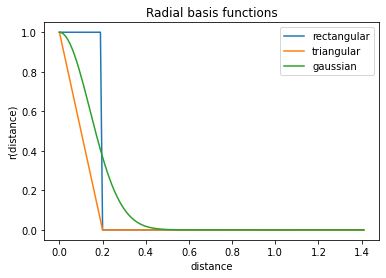

In [7]:
# "mobile" radial basis functions

def rectangular_function(dis,sig):
    if (dis<sig):
        return 1
    else:
        return 0

def traingular_function(dis,sig):
    if (dis<sig):
        return 1-(dis/sig)
    else:
        return 0

def gaussian_function(dis,eps):
    return 1/(math.e**((dis*eps)**2))

X=np.arange(0,2**0.5,0.01)
Y_r=[rectangular_function(x,sigma) for x in X]
Y_t=[traingular_function(x,sigma) for x in X]
Y_g=[gaussian_function(x,epsilon) for x in X]


plt.plot(X, Y_r, label = "rectangular")
plt.plot(X, Y_t, label = "triangular")
plt.plot(X, Y_g, label = "gaussian")

# naming the x axis
plt.xlabel('distance')
# naming the y axis
plt.ylabel('r(distance)')
# giving a title to my graph
plt.title('Radial basis functions')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

In [5]:
#probabilitu function

def prob(v_i,v_j,pr,al,par,S,m):
    distance=np.linalg.norm(v_i-v_j)
    return pr-al + al*(m-1)*gaussian_function(distance,par)/S

In [6]:
#parameters

n=500 # number of nodes
p=0.01 # max prob
a=0.00625 # alpha tuning parameter, must be less than p

sigma=0.2 #radial basis function parameter
epsilon=5 #guassian radial basis function parameter

not overcome the supercritical threshold ln(N) with k

In [8]:
print("n=",n)
k=p*(n-1)
print("ln(n)=",math.log(n,math.e))
print("<k>=",k)

n= 500
ln(n)= 6.214608098422191
<k>= 4.99


In [578]:
#generation of the network

g=nx.Graph() #empty graph
d={} #empty dictionary

for i in range(0,n):
    g.add_node(i)
    d[i]=extreme_coordinates()
    
# consider every possible link between each node
for j in range (0, n):
    #find the sum of radial basis function values
    D=0
    for i in range(0,n):
        if(i!=j):
            D+=gaussian_function(np.linalg.norm(np.array((d[j][0],d[j][1]))-np.array((d[i][0],d[i][1]))),epsilon)
    for h in range (j+1, n):
        v_j=np.array((d[j][0],d[j][1]))
        v_h=np.array((d[h][0],d[h][1]))
        p_l=prob(v_j,v_h,p,a,epsilon,D,n) #checks the consistency between entered parameter and radial function
        r=random.random()
        if (r <= p_l):
            g.add_edge(j, h)
gcc = sorted(nx.connected_components(g), key=len, reverse=True)
g = g.subgraph(gcc[0])

## NETWORK VISUALIZATION

In [587]:
print("actual n:", len(g.nodes))
print("actual l: ",len(g.edges))
print("actual ln(n): ",math.log(len(g.nodes),math.e))
print("actual <k>: ",2*len(g.edges)/len(g.nodes))
print("density: ",2*len(g.edges)/(len(g.nodes)*(len(g.nodes)-1)))
#print(g.adj)

actual n: 495
actual l:  1261
actual ln(n):  6.20455776256869
actual <k>:  5.094949494949495
density:  0.010313662945241893


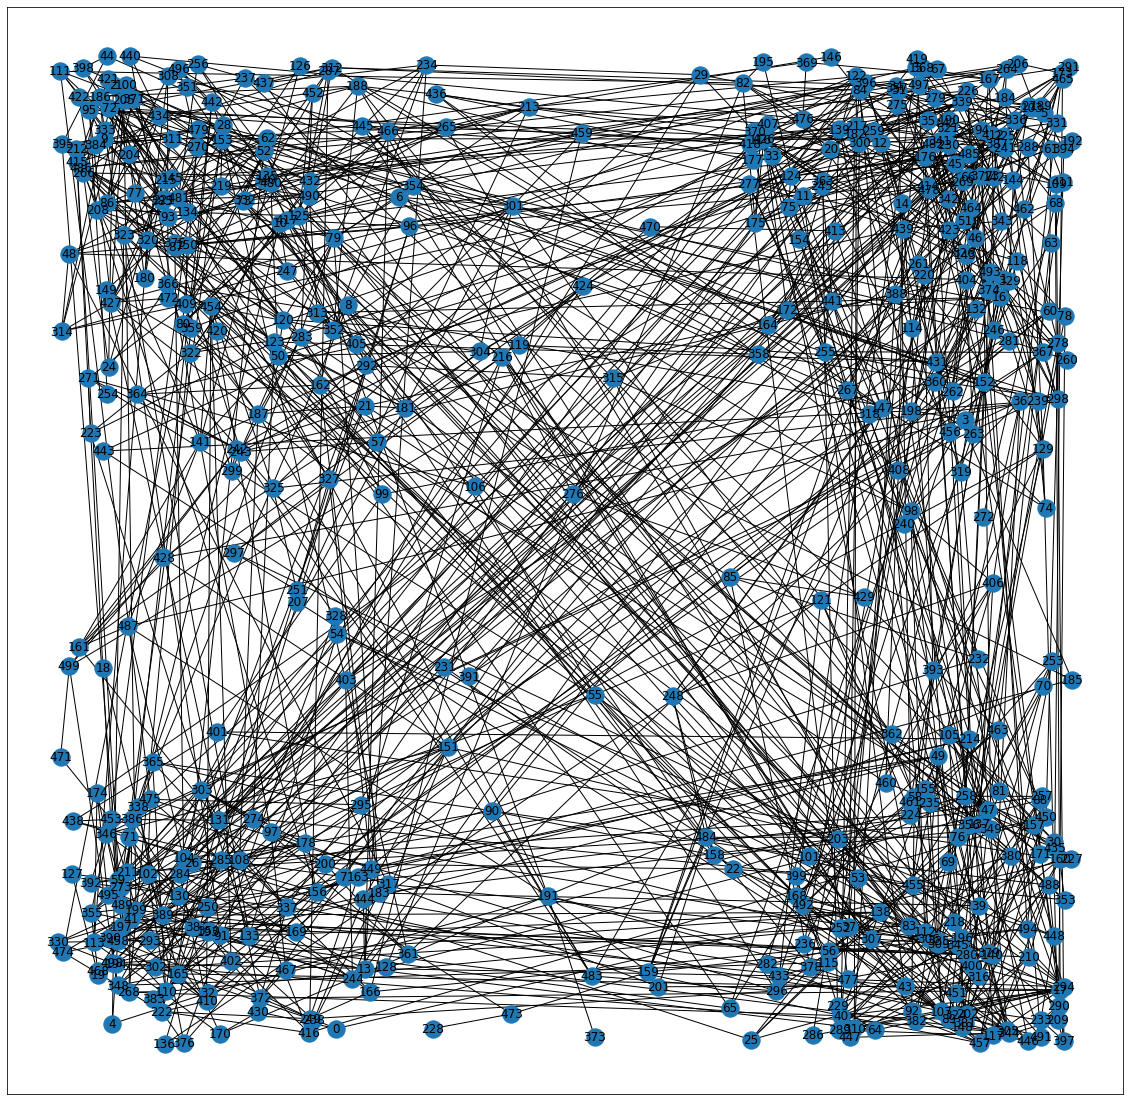

In [582]:
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=d, arrows=None, with_labels=True)

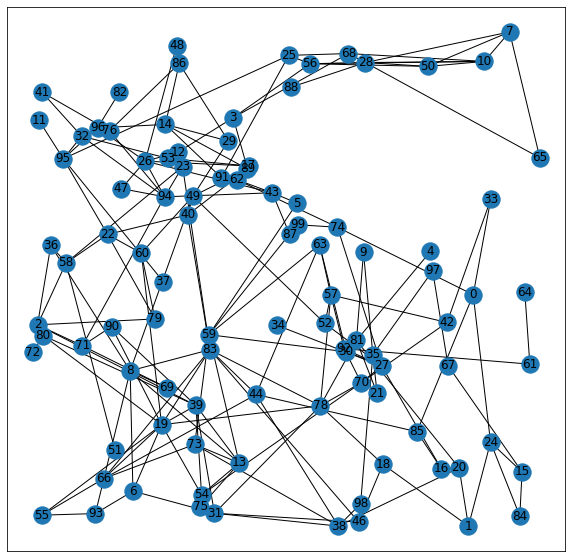

In [552]:
plt.figure(figsize=(10,10))
nx.draw_networkx(g, pos=d, arrows=None, with_labels=True)

## SINGLE NETWORK ANALYSIS

### Transitivity

In [583]:
print("density: ",2*len(g.edges)/(len(g.nodes)*(len(g.nodes)-1)))

density:  0.010313662945241893


In [584]:
print('graph - average local clustering: {}'.format(nx.average_clustering(g)))

graph - average local clustering: 0.01801565437929074


### Path lenght

In [585]:
print("Average shortest path:", nx.average_shortest_path_length(g))

Average shortest path: 4.050243323927535


In [586]:
print("Expected shortest path in a small world:",math.log(len(g.nodes))/math.log(2*len(g.edges)/len(g.nodes)))

Expected shortest path in a small world: 3.810568831650927


## BATCH ANALYSIS

In [9]:
def simulation(N,P,T,R,epsilon): # N number of vertex, P link probability, T times to repeat simulation with fix parameter, R range of alpha, 
    Cm=[]
    Pm=[]
    for a in R:
        Ct=[]
        Pt=[]
        for t in T:
            g=nx.Graph() #empty graph
            d={} #empty dictionary

            for i in range(0,N):
                g.add_node(i)
                d[i]=uniform_coordinates()
            # consider every possible link between each node
            for j in range (0, N):
                #find the sum of radial basis function values
                D=0
                for i in range(0,N):
                    if(i!=j):
                        D+=gaussian_function(np.linalg.norm(np.array((d[j][0],d[j][1]))-np.array((d[i][0],d[i][1]))),epsilon)
                for h in range (j+1, N):
                    v_j=np.array((d[j][0],d[j][1]))
                    v_h=np.array((d[h][0],d[h][1]))
                    p_l=prob(v_j,v_h,P,a,epsilon,D,N) #checks the consistency between entered parameter and radial function
                    r=random.random()
                    if (r <= p_l):
                        g.add_edge(j, h)
            gcc = sorted(nx.connected_components(g), key=len, reverse=True) #take just the greatest component
            g = g.subgraph(gcc[0])
            
            Cc=nx.average_clustering(g)
            Pp=nx.average_shortest_path_length(g)
            Pt.append(Pp)
            Ct.append(Cc)
        Ca=np.mean(Ct)
        Pa=np.mean(Pt)
        Cm.append(Ca)
        Pm.append(Pa)
        
    
    return(Cm, Pm) #vectors of average cluster coefficient and path 
    

In [10]:
#options
n_vertices=500
link_prob=0.009
averaging_rep=range(0,10)
range_alpha=np.arange(0,link_prob+link_prob/8,link_prob/8)
coef_rbf=5

#check, n>>k>>ln(n)>>1
print("n_vertices:",n_vertices)
k2=link_prob*(n_vertices-1)
print("<k>:",k2)
print("ln(n):",math.log(n_vertices,math.e))

n_vertices: 500
<k>: 4.491
ln(n): 6.214608098422191


In [11]:
y,z=simulation(n_vertices,link_prob,averaging_rep,range_alpha,coef_rbf)

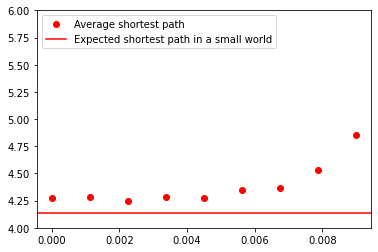

In [12]:
plt.plot(range_alpha,z,'o',color='red',label='Average shortest path')
plt.axhline(y=math.log(n_vertices)/math.log(k2),xmin=0, xmax=1,c='red',label='Expected shortest path in a small world')
plt.ylim([4, 6])
plt.legend(loc="upper left")

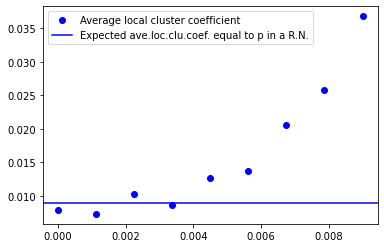

In [13]:
plt.plot(range_alpha,y,'o',color='blue',label='Average local cluster coefficient')
plt.axhline(y=link_prob,xmin=0, xmax=1,c='blue',label='Expected ave.loc.clu.coef. equal to p in a R.N.')
plt.legend(loc="upper left")

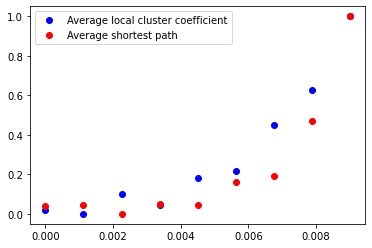

In [14]:
plt.plot(range_alpha,(y-min(y))/(max(y)-min(y)),'o',color='blue', label='Average local cluster coefficient')
plt.plot(range_alpha,(z-min(z))/(max(z)-min(z)),'o',color='red', label='Average shortest path')
plt.legend(loc="upper left")

### LOCAL CLUSTER COEF vs DEGREE  (saving some phenomenon)

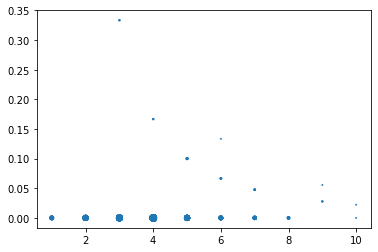

In [412]:
from collections import Counter
x_vals = list(dict(nx.degree(g)).values())
y_vals = list(nx.clustering(g).values())

combos = list(zip(x_vals, y_vals))
weight_counter = Counter(combos)

weights = [weight_counter[(x_vals[i], y_vals[i])] for i, _ in enumerate(x_vals)]

plt.scatter(x_vals, y_vals, s=weights, alpha=0.8)
plt.show()

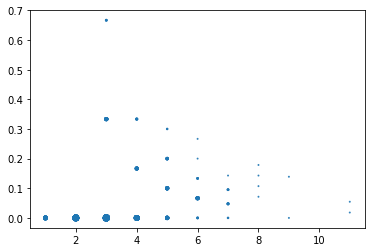

In [425]:
x_vals = list(dict(nx.degree(g)).values())
y_vals = list(nx.clustering(g).values())

combos = list(zip(x_vals, y_vals))
weight_counter = Counter(combos)

weights = [weight_counter[(x_vals[i], y_vals[i])] for i, _ in enumerate(x_vals)]

plt.scatter(x_vals, y_vals, s=weights, alpha=0.8)
plt.show()